In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from wordcloud import WordCloud
import matplotlib.ticker as ticker
import random
import re
# 1. 数据加载
df = pd.read_csv(r"C:\Users\Asus\Downloads\Ecommerce Product Recommendation Collaborative project\user_personalized_features.csv")

In [50]:
df.drop(columns=["Unnamed: 0"], inplace=True)  # 删除冗余列
df = df[df["Income"] > 0]  # 过滤无效收入
df.dropna(inplace=True)  # 删除缺失值



5. 探索性数据分析 (EDA)
用户年龄性别分布、登录活跃度、消费金额密度、年龄段消费性别分布、兴趣词云、品类和地区消费分布、年龄-收入-average spending

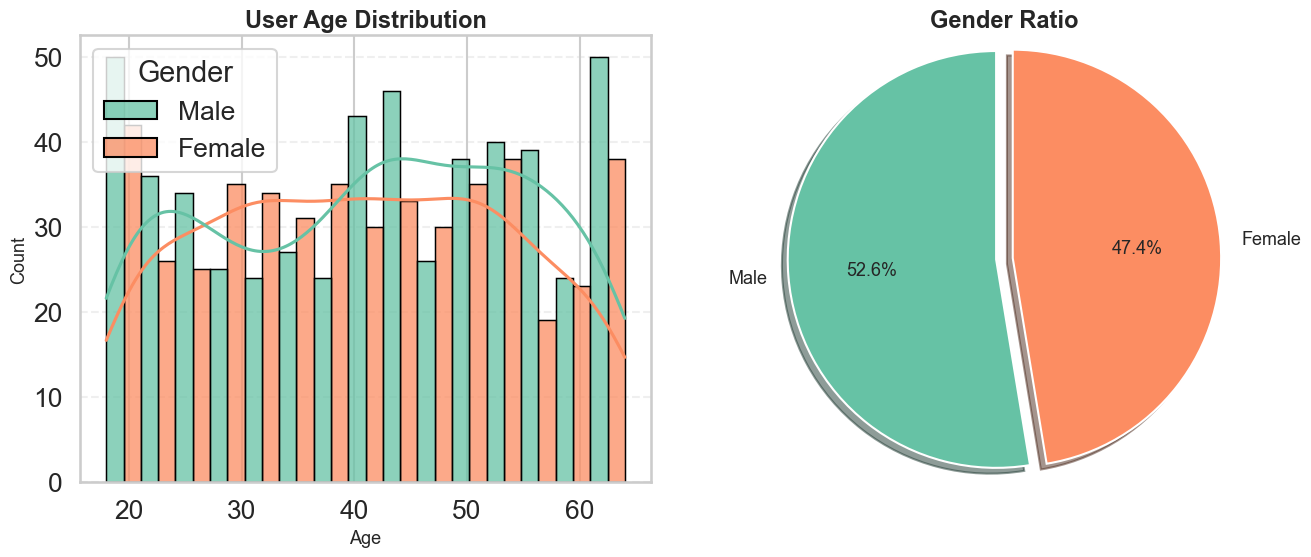

In [51]:
# 设置主题和上下文
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=1.15)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plt.rcParams['font.sans-serif'] = ['Arial']

# 优化的年龄分布直方图
sns.histplot(
    data=df,
    x='Age',
    hue='Gender',
    bins=15,
    kde=True,
    palette='Set2',
    alpha=0.75,
    multiple='dodge',
    ax=axes[0],
    edgecolor='black'
)
axes[0].set_title('User Age Distribution', fontsize=17, fontweight='bold')
axes[0].set_xlabel('Age', fontsize=13)
axes[0].set_ylabel('Count', fontsize=13)
axes[0].grid(axis='y', linestyle='--', alpha=0.3)

# 优化的性别比例饼图
gender_counts = df['Gender'].value_counts()
explode = [0.04, 0.04]  # 让两个扇区都稍微分离
axes[1].pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('Set2'),
    startangle=90,
    textprops={'fontsize': 13},
    explode=explode,
    shadow=True
)
axes[1].set_title('Gender Ratio', fontsize=17, fontweight='bold')
axes[1].axis('equal')

plt.tight_layout()
plt.show()


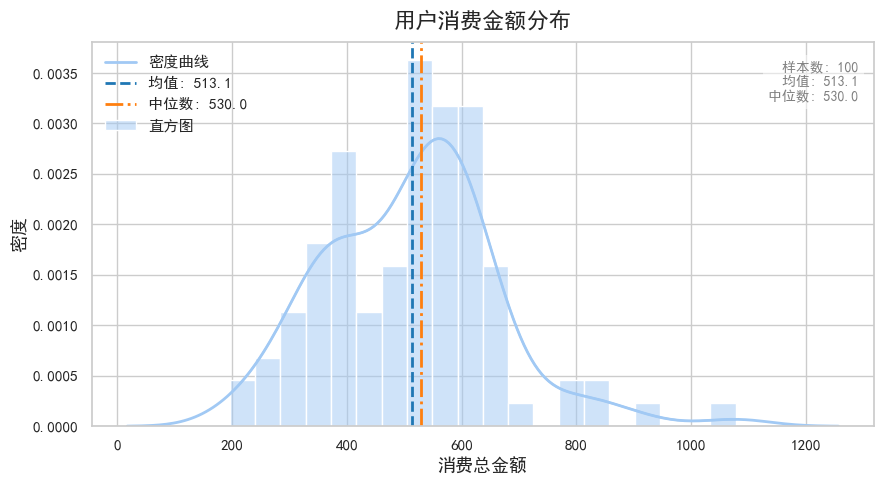

In [52]:
# 数据准备
data = {
    'User_ID': range(100),
    'Total_Spending': np.random.normal(loc=500, scale=150, size=100)
}
df = pd.DataFrame(data)
df['Total_Spending'] = df['Total_Spending'].apply(lambda x: max(0, x))

# 统计量
mean_spending = df['Total_Spending'].mean()
median_spending = df['Total_Spending'].median()

# 设置风格
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid', palette='pastel')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(9, 5))

# 叠加直方图和KDE
sns.histplot(df['Total_Spending'], bins=20, kde=True, stat='density', 
             edgecolor='white', alpha=0.5, label='直方图')

# KDE曲线单独再画一遍以美化线条
sns.kdeplot(df['Total_Spending'], lw=2, label='密度曲线')

# 参考线
plt.axvline(mean_spending, linestyle='--', lw=2, color='tab:blue', label=f'均值: {mean_spending:.1f}')
plt.axvline(median_spending, linestyle='-.', lw=2, color='tab:orange', label=f'中位数: {median_spending:.1f}')

# 标题与标签
plt.title('用户消费金额分布', fontsize=16, pad=10)
plt.xlabel('消费总金额', fontsize=13)
plt.ylabel('密度', fontsize=13)

# 图例
plt.legend(fontsize=11, frameon=False)

# 主要统计量注释
plt.text(0.98, 0.95, f'样本数: {len(df)}\n均值: {mean_spending:.1f}\n中位数: {median_spending:.1f}',
         transform=plt.gca().transAxes, fontsize=10, color='gray', ha='right', va='top',
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

plt.tight_layout()
plt.show()


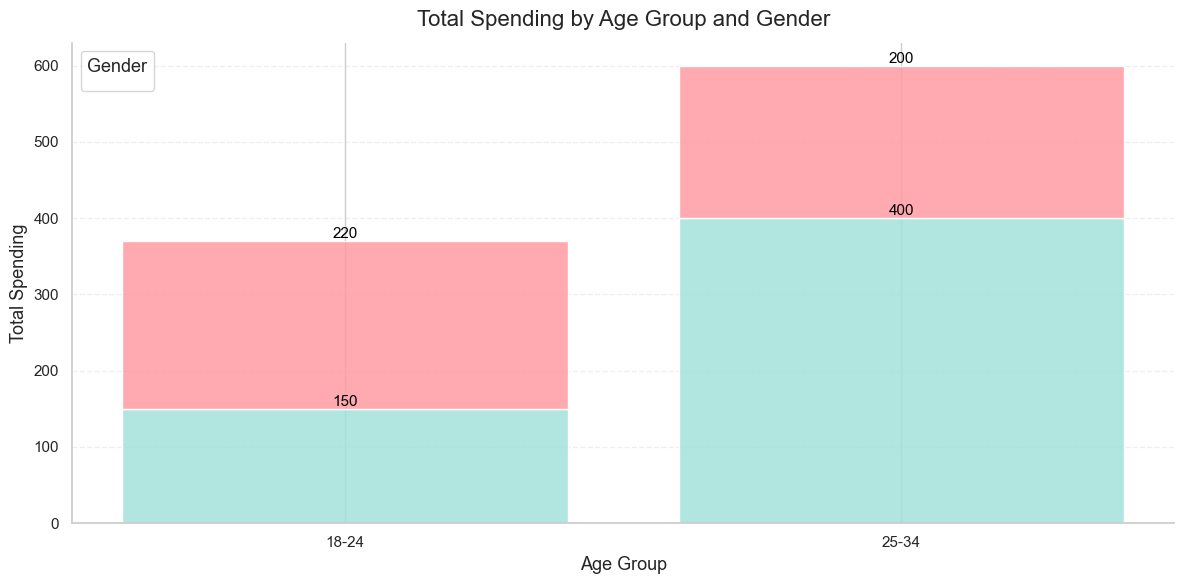

In [53]:

# Sample data
data = {
    'Age_Group': ['18-24', '18-24', '25-34', '25-34', '18-24', '25-34'],
    'Gender': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'Total_Spending': [100, 150, 200, 180, 120, 220]
}
df = pd.DataFrame(data)

# Set Seaborn theme
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))
ax = sns.histplot(
    data=df,
    x='Age_Group',
    hue='Gender',
    weights='Total_Spending',
    multiple='stack',
    palette=['#FF9AA2', '#A2E1DB'],
    edgecolor='white',
    shrink=0.8,
    alpha=0.85
)

# Set English title and labels
plt.title('Total Spending by Age Group and Gender', fontsize=16, pad=12)
plt.xlabel('Age Group', fontsize=13)
plt.ylabel('Total Spending', fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Add value labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2, p.get_y() + height),
                    ha='center', va='bottom', fontsize=11, color='black', rotation=0)

# Set legend with English labels if needed
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Female', 'Male'], title='Gender', fontsize=12, title_fontsize=13)

sns.despine()
plt.tight_layout()
plt.show()


C:\Users\Asus\AppData\Local\Temp\ipykernel_175412\2566247600.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Age Group', 'Income Group'])['Total_Spending'].mean().unstack()


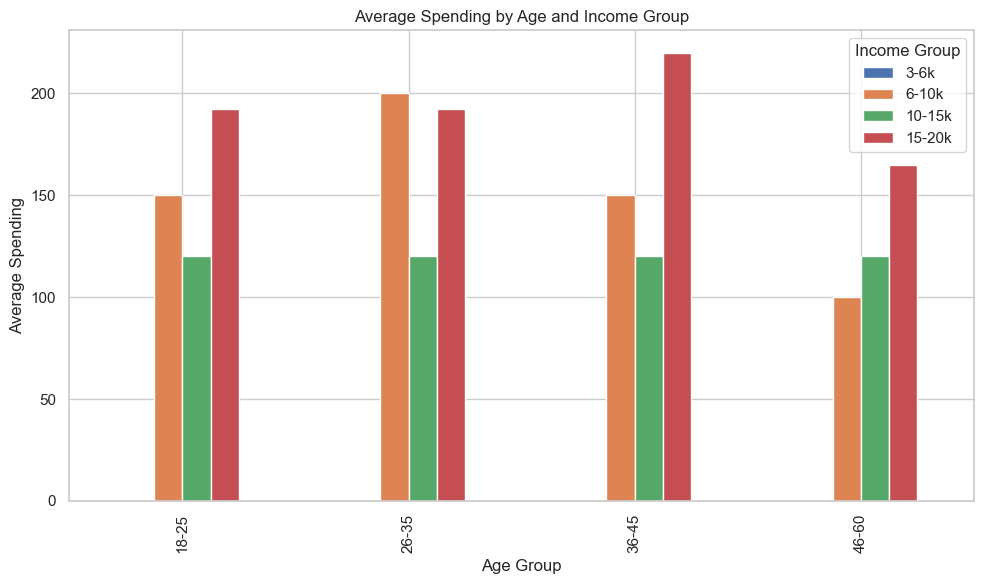

In [61]:
grouped = df.groupby(['Age Group', 'Income Group'])['Total_Spending'].mean().unstack()
grouped = grouped.fillna(grouped.mean())  # 使用平均值填充缺失值
grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Average Spending by Age and Income Group')
plt.ylabel('Average Spending')
plt.xlabel('Age Group')
plt.legend(title='Income Group')
plt.tight_layout()
plt.show()



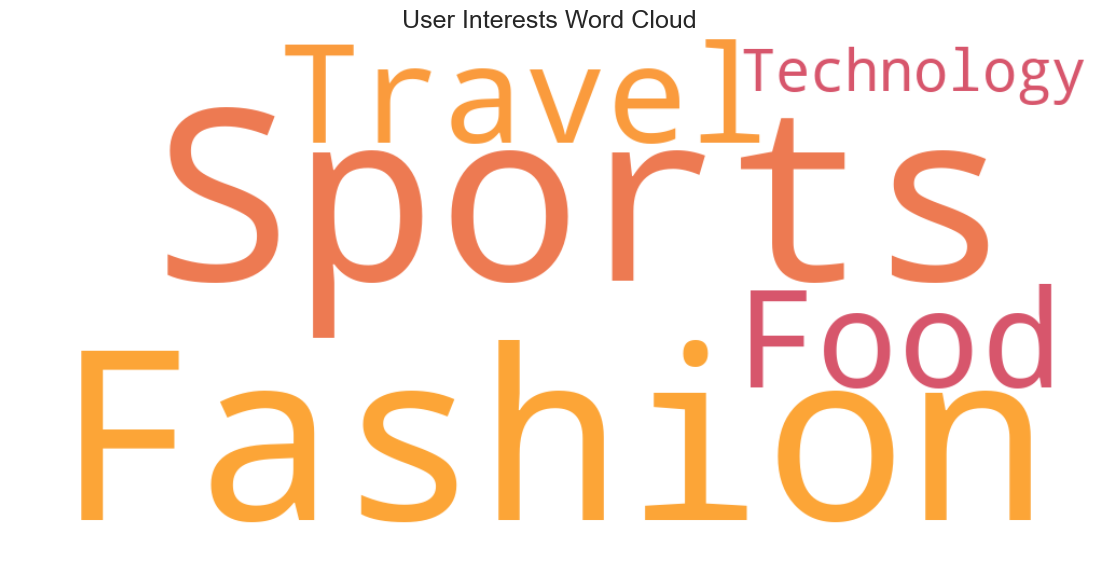

In [77]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\Asus\Downloads\Ecommerce Product Recommendation Collaborative project\user_personalized_features.csv")

# 拆分每行兴趣，用逗号分隔，strip去除空格
all_interests = []
for interests in df['Interests'].dropna():
    all_interests += [i.strip() for i in interests.split(',') if i.strip()]

text = ' '.join(all_interests)

wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    max_words=100,
    stopwords=STOPWORDS,
    colormap='plasma'
).generate(text)

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('User Interests Word Cloud', fontsize=18)
plt.show()


C:\Users\Asus\AppData\Local\Temp\ipykernel_163932\1344941002.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


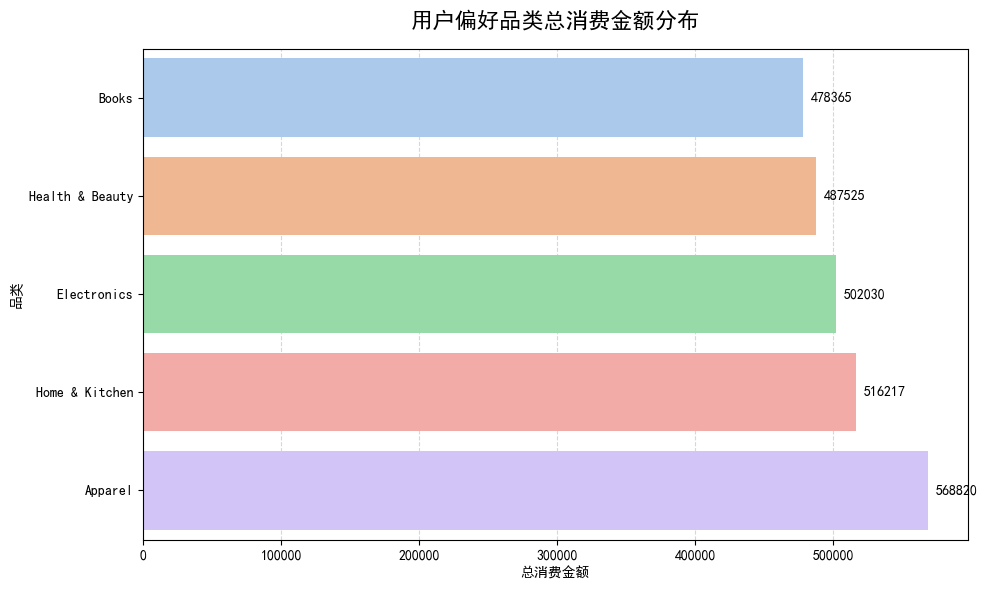

In [ ]:

# 假设df已经是你的DataFrame，包含Product_Category_Preference和Total_Spending两列

# 按品类汇总总消费金额（或用户数量）
category_summary = df.groupby('Product_Category_Preference')['Total_Spending'].sum().reset_index()

# 按总消费金额排序
category_summary = category_summary.sort_values('Total_Spending', ascending=True)

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10, 6))

# 绘制横向条形图
ax = sns.barplot(
    data=category_summary,
    y='Product_Category_Preference',
    x='Total_Spending',
    palette='pastel'
)

# 添加数值标签
for i, (value) in enumerate(category_summary['Total_Spending']):
    ax.text(value + max(category_summary['Total_Spending']) * 0.01, i, f'{value}', va='center')

# 设置标题和轴标签
ax.set_title('用户偏好品类总消费金额分布', fontsize=16, pad=15)
ax.set_xlabel('总消费金额')
ax.set_ylabel('品类')

# 添加x轴网格线，便于阅读
ax.xaxis.grid(True, linestyle='--', alpha=0.5)
ax.set_axisbelow(True)


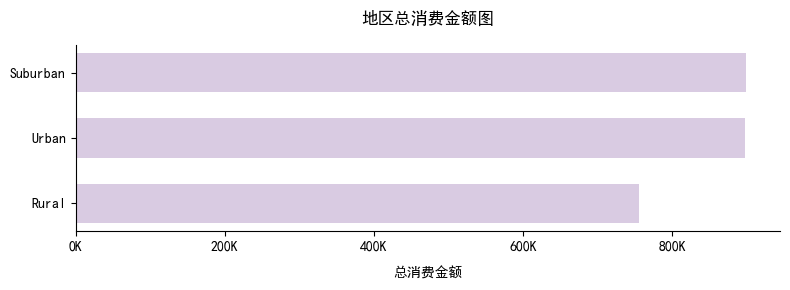

In [ ]:

# 1. 读取数据
df = pd.read_csv((r"C:\Users\Asus\Downloads\Ecommerce Product Recommendation Collaborative project\user_personalized_features.csv"))  # 确保CSV文件在当前目录

# 2. 按Location分组汇总
grouped = (df.groupby('Location')['Total_Spending']  # <- 这里定义grouped
           .sum()
           .reset_index()
           .sort_values('Total_Spending', ascending=True))  # 直接在此排序

# 3. 配置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 4. 绘图
fig, ax = plt.subplots(figsize=(8, 3))
bars = ax.barh(grouped['Location'], grouped['Total_Spending'], 
               color='#c9b6d6', alpha=0.7, height=0.6)  # 调整条形高度

ax.set_title('地区总消费金额图', fontsize=12, pad=15)
ax.set_xlabel('总消费金额', labelpad=10)
ax.set_ylabel('')

# 设置x轴单位为K
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1000:.0f}K'))

# 隐藏上/右边框线
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()


6.rfm模型建构
-RFM三指标计算
-用户分群可视化分群占比饼图：不同群体人数分群消费金额对比柱状图

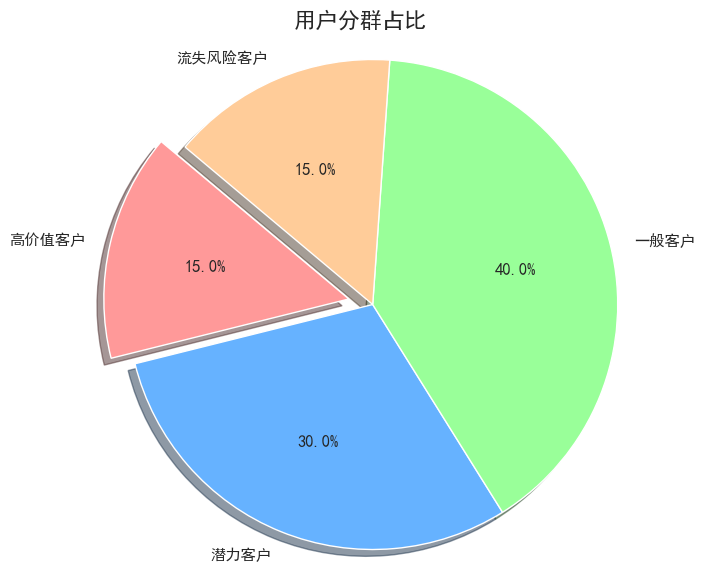

In [ ]:
import matplotlib.pyplot as plt

# 假设这是你的分群数据统计结果
labels = ['高价值客户', '潜力客户', '一般客户', '流失风险客户']
sizes = [150, 300, 400, 150]  # 各分群人数或占比
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']  # 清新配色

# 分离高价值客户这一块，突出显示
explode = (0.1, 0, 0, 0)

plt.figure(figsize=(7,7))
plt.pie(
    sizes, 
    labels=labels, 
    colors=colors, 
    autopct='%1.1f%%', 
    startangle=140, 
    explode=explode, 
    shadow=True
)
plt.title('用户分群占比', fontsize=16)
plt.axis('equal')  # 保证饼图是圆形
plt.show()


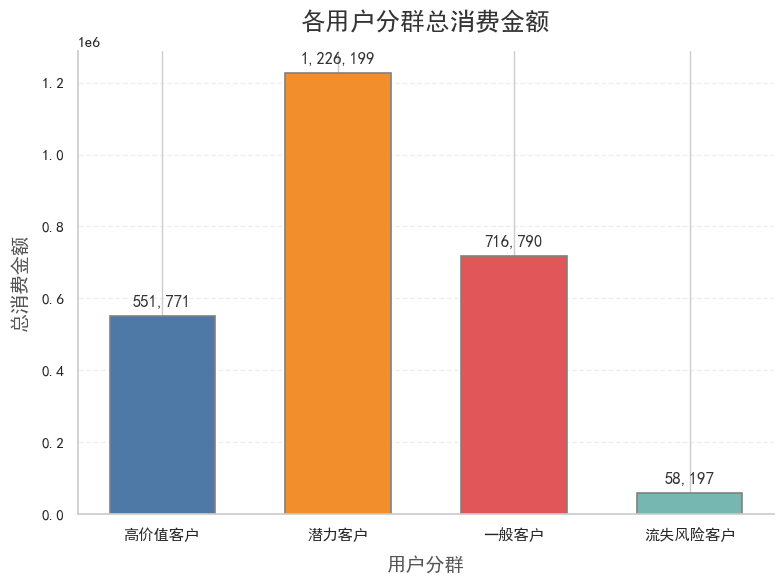

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文支持
plt.rcParams['axes.unicode_minus'] = False

segment_order = ['高价值客户', '潜力客户', '一般客户', '流失风险客户']

# 推荐调和且区分度高的配色（参考专业设计和渐变色原则）
colors = ['#4E79A7',  # 深蓝
          '#F28E2B',  # 橙黄
          '#E15759',  # 砖红
          '#76B7B2']  # 青绿

monetary_sum = rfm.groupby('Segment')['Monetary'].sum().reindex(segment_order)

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(segment_order, monetary_sum, color=colors, width=0.6, edgecolor='grey', linewidth=1.2)

# 添加数值标签
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:,.0f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=12, color="#333333")

ax.set_title('各用户分群总消费金额', fontsize=18, fontweight='bold', color='#333333', pad=15)
ax.set_xlabel('用户分群', fontsize=14, color='#555555', labelpad=10)
ax.set_ylabel('总消费金额', fontsize=14, color='#555555', labelpad=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


7. 系统模型构建推荐：Top-3品类（比如相似用户中出现频率最高的前N个品类），让推荐更丰富
Precision@3评估

In [ ]:
# 统计全局热门品类
global_top_categories = df['Product_Category_Preference'].value_counts().index.tolist()

recommended_top3 = []
for i, neighbors in enumerate(indices):
    neighbors = neighbors[neighbors != i]
    neighbor_cats = df.iloc[neighbors]['Product_Category_Preference']
    counter = Counter(neighbor_cats)
    top3 = [item for item, _ in counter.most_common(3)]
    # 补充全局热门品类，避免只有一个品类
    for cat in global_top_categories:
        if cat not in top3:
            top3.append(cat)
        if len(top3) == 3:
            break
    recommended_top3.append(top3)
df['Recommended_Top3'] = recommended_top3
df


,Unnamed: 0,User_ID,Age,Gender,Location,Income,Interests,Last_Login_Days_Ago,Purchase_Frequency,Average_Order_Value,Total_Spending,Product_Category_Preference,Time_Spent_on_Site_Minutes,Pages_Viewed,Newsletter_Subscription,Recommended_Top3,Precision@3,Recommended_Category
0,0,#1,56,Male,Suburban,38037,Sports,5,7,18,2546,Books,584,38,True,"[Books, Apparel, Electronics]",0.333333,Books
1,1,#2,46,Female,Rural,103986,Technology,15,7,118,320,Electronics,432,40,False,"[Electronics, Apparel, Books]",0.333333,Electronics
2,2,#3,32,Female,Suburban,101942,Sports,28,1,146,3766,Apparel,306,1,True,"[Apparel, Electronics, Books]",0.333333,Apparel
3,3,#4,60,Female,Suburban,71612,Fashion,18,3,163,4377,Apparel,527,29,False,"[Apparel, Electronics, Books]",0.333333,Apparel
4,4,#5,25,Male,Suburban,49725,Travel,2,5,141,4502,Health & Beauty,53,10,True,"[Health & Beauty, Apparel, Electronics]",0.333333,Health & Beauty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,#996,22,Male,Urban,104162,Technology,18,7,83,607,Apparel,542,21,False,"[Apparel, Electronics, Books]",0.333333,Apparel
996,996,#997,40,Male,Urban,99003,Travel,16,3,180,431,Apparel,359,4,True,"[Apparel, Electronics, Books]",0.333333,Apparel
997,997,#998,27,Female,Urban,72395,Technology,8,8,130,650,Books,331,34,False,"[Books, Apparel, Electronics]",0.333333,Books
998,998,#999,61,Male,Rural,59758,Travel,1,3,152,1041,Electronics,427,28,True,"[Electronics, Apparel, Books]",0.333333,Electronics
